In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


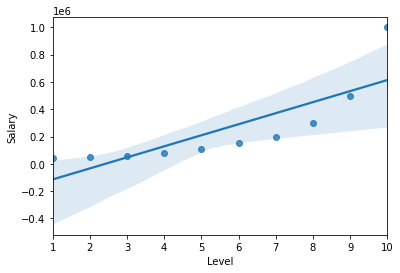

In [5]:
sns.regplot('Level','Salary',data=df)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
pf = PolynomialFeatures(degree=4)

In [8]:
X = df[['Level']]
y = df['Salary']

In [9]:
X = pf.fit_transform(X)

In [10]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [11]:
yhat = reg.predict(X)

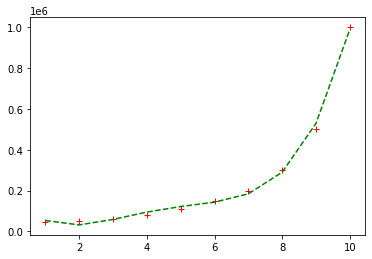

In [12]:
plt.plot(df['Level'],y,'r+')
plt.plot(df['Level'],yhat,'g--')
plt.show()

# save a model

In [13]:
import pickle
with open('poly_reg_features.p','wb') as f:
    pickle.dump(pf, f)
with open('poly_reg_salary_prediction.p', 'wb') as f:
    pickle.dump(reg, f)
    print('success')

success


In [13]:
xinp  = np.array([[6.5]])

In [14]:
xinp = pf.transform(xinp)

In [15]:
reg.predict(xinp)

array([158862.45265157])

In [16]:
reg.score(X,y)

0.9973922891706614

# testing regression on automobile dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('automobiles.csv',index_col=0)


In [19]:
X = df[['horsepower']]
y= df['price']
Xtrain,Xtest, ytrain, ytest = train_test_split(X,y,test_size=.2, random_state=0)

In [20]:
pf = PolynomialFeatures(degree=3) # polynomial obj
Xptrain = pf.fit_transform(Xtrain)  # object fitted and retrieved converted data
reg = LinearRegression()  # algo object
reg.fit(Xptrain,ytrain)   # algo fit
Xptest = pf.transform(Xtest) # pf used to convert test data also, without a need for fitting
reg.score(Xptest, ytest)  * 100  # score of the test data also called R^2

80.01760330922093

make stuff modular using fuction

In [28]:
def polynomial_model(X,y,model=LinearRegression(),degree=2):
    Xtrain,Xtest, ytrain, ytest = train_test_split(X,y,test_size=.2, random_state=0)
    pf = PolynomialFeatures(degree=degree) # polynomial obj
    Xptrain = pf.fit_transform(Xtrain)  # object fitted and retrieved converted data
    model.fit(Xptrain,ytrain)   # algo fit
    Xptest = pf.transform(Xtest) # pf used to convert test data also, without a need for fitting
    print(Xptest.shape)
    score = model.score(Xptest, ytest) * 100
    yhat=  reg.predict(Xptest)
    plt.plot(Xtest, ytest,'ro','original data')
    plt.plot(Xtest, yhat,'g+','predicted values')
    plt.text(x=0,y=0,s=f'R^2 {score}')
    plt.show()

(41, 4)


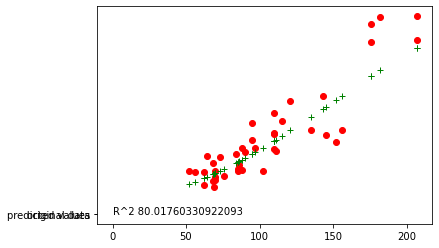

In [30]:
polynomial_model(X,y,degree=3)